<a href="https://colab.research.google.com/github/mseddiwiem/Trash_classification/blob/main/classification_D%C3%A9chets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries :

In [1]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Data Importing :

In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "/content/drive/MyDrive/Data"

classes = os.listdir(dir_example)
print(classes)

['train', 'test']


In [4]:
import os
dir_example = "/content/drive/MyDrive/Data/train"

train_classes = os.listdir(dir_example)
print(train_classes)

['E-waste', 'Plastic', 'Metal', 'Glass', 'Paper', 'Organic']


Data Configuration :

In [5]:
train = '/content/drive/MyDrive/Data/train'
test = '/content/drive/MyDrive/Data/test'

Preparing the Data :

Creating a Generator for Training Set :

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 117 images belonging to 6 classes.
{'E-waste': 0, 'Glass': 1, 'Metal': 2, 'Organic': 3, 'Paper': 4, 'Plastic': 5} 

{0: 'E-waste', 1: 'Glass', 2: 'Metal', 3: 'Organic', 4: 'Paper', 5: 'Plastic'}


In [8]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

Creating a Generator for Testing Set :

In [9]:
from keras.preprocessing.image import ImageDataGenerator

test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 71 images belonging to 6 classes.
{'E-waste': 0, 'Glass': 1, 'Metal': 2, 'Organic': 3, 'Paper': 4, 'Plastic': 5} 

{0: 'E-waste', 1: 'Glass', 2: 'Metal', 3: 'Organic', 4: 'Paper', 5: 'Plastic'}


In [10]:
for image_batch, label_batch in test_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

Writing the labels into a text file 'Labels.txt ' :


In [11]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'E-waste': 0, 'Glass': 1, 'Metal': 2, 'Organic': 3, 'Paper': 4, 'Plastic': 5}


Model Creation :

In [18]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Dropout

model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 37, 37, 32)      

In [21]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


Training the Model :

In [24]:
model.fit_generator(train_generator,
          epochs=10,
          steps_per_epoch=100//32)

<ipython-input-24-8edeefbaf178>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


Epoch 1/10
3/3 [==============================] - 6s 2s/step - loss: 1.7678 - accuracy: 0.2083
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 1.7368 - accuracy: 0.2353
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 1.7819 - accuracy: 0.2353
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 1.7224 - accuracy: 0.2941
Epoch 5/10
3/3 [==============================] - 5s 2s/step - loss: 1.7275 - accuracy: 0.2706
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 1.6149 - accuracy: 0.3176
Epoch 7/10
3/3 [==============================] - 6s 2s/step - loss: 1.6020 - accuracy: 0.3176
Epoch 8/10
3/3 [==============================] - 5s 1s/step - loss: 1.6455 - accuracy: 0.3529
Epoch 9/10
3/3 [==============================] - 5s 2s/step - loss: 1.5207 - accuracy: 0.4118
Epoch 10/10
3/3 [==============================] - 6s 2s/step - loss: 1.4456 - accuracy: 0.4706


Testing Predictions :

In [25]:
# from keras.preprocessing import image
import keras.utils as ku
import numpy as np

1/1 [==============================] - 0s 23ms/step
Probability: 0.26034698
Classified: Metal 



Text(0.5, 1.0, 'Loaded Image')

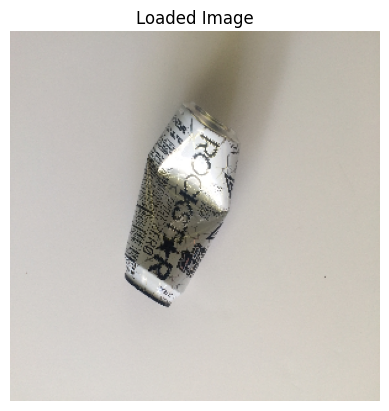

In [28]:
import matplotlib.pyplot as plt
test_img = '/content/drive/MyDrive/Data/test/Metal/M7.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

1/1 [==============================] - 0s 19ms/step
Probability: 0.355256
Classified: E-waste 



Text(0.5, 1.0, 'Loaded Image')

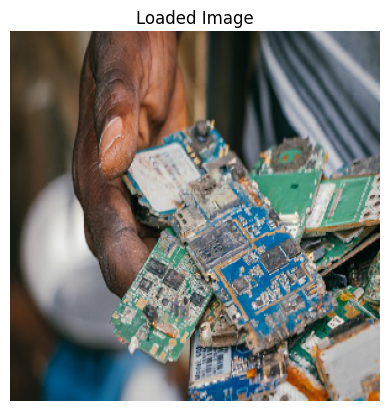

In [29]:
import matplotlib.pyplot as plt
test_img = '/content/drive/MyDrive/Data/test/E-waste/E2.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

1/1 [==============================] - 0s 20ms/step
Probability: 0.30407524
Classified: Plastic 



Text(0.5, 1.0, 'Loaded Image')

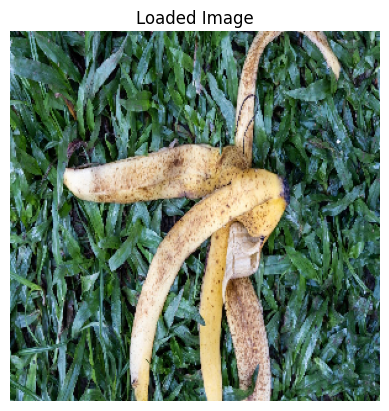

In [30]:
import matplotlib.pyplot as plt
test_img = '/content/drive/MyDrive/Data/test/Organic/O1.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

1/1 [==============================] - 0s 29ms/step
Probability: 0.2694395
Classified: Plastic 



Text(0.5, 1.0, 'Loaded Image')

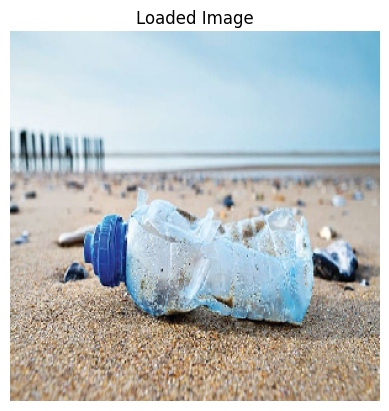

In [32]:
import matplotlib.pyplot as plt
test_img = '/content/drive/MyDrive/Data/test/Plastic/PL4.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

1/1 [==============================] - 0s 19ms/step
Probability: 0.670197
Classified: Glass 



Text(0.5, 1.0, 'Loaded Image')

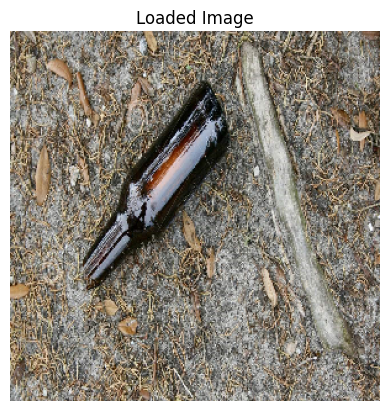

In [33]:
import matplotlib.pyplot as plt
test_img = '/content/drive/MyDrive/Data/test/Glass/G9.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

1/1 [==============================] - 0s 19ms/step
Probability: 0.22342455
Classified: Organic 



Text(0.5, 1.0, 'Loaded Image')

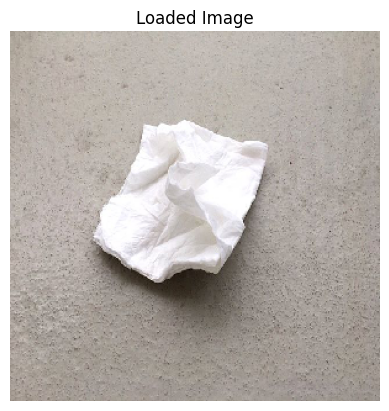

In [35]:
import matplotlib.pyplot as plt
test_img = '/content/drive/MyDrive/Data/test/Paper/PA3.jpeg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

Testing shows that the model is fairly successful in classifying the type of waste
